# L9 
# C2C Shelby Fletcher

## 1) With the tips.csv data set, find: 
    a) the mean tip broken down by sex; build a histogram with females overlayed by males. 
    b) the mean tip broken down by time; build a histogram with females overlayed by males. 

In [1]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# Importing the table and reading the data
tips = Table.read_table('tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


Tips for males are: 3.0896178343949043
Tips for females are: 2.8334482758620685


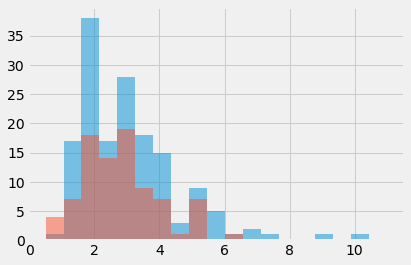

In [3]:
# finding the mean tip broken down by sex and creating the overlaying histogram
males = tips.where('sex', 'Male')
mTip = np.mean(males.column('tip'))
print('Tips for males are:', mTip)


females = tips.where('sex', 'Female')
fTip = np.mean(females.column('tip'))
print('Tips for females are:', fTip)

bins = np.linspace(0.5,11,20)
plots.hist(males.column('tip'), bins, alpha = 0.5, label='Male Tips')
plots.hist(females.column('tip'), bins, alpha = 0.5, label='Female Tips')
plots.show()

In [33]:
def weekday_to_num(day):

    if day == 'Mon':
        return 1
    elif day == 'Tues':
        return 2
    elif day == 'Wed':
        return 3
    elif day == 'Thur':
        return 4
    elif day == 'Fri':
        return 5
    elif day == 'Sat':
        return 6
    elif day == 'Sun':
        return 7
    else:
        return "Please enter a valid day."
    

In [34]:
# add this data to the tips table
new = tips.with_columns('weekday_num',tips.apply(weekday_to_num,'day'))
new

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


In [45]:
# create a function that will predict the tip amount based on total_bill

def est_tip(total_bill):
    estimate = tips.where('total_bill', are.between(total_bill-1, total_bill+1)).column('tip')
    return np.mean(estimate)

In [46]:
est_tip(10)

1.821578947368421

In [50]:
# add the estimated tip into the tips table.

estnew = tips.with_column('Estimated Tip', tips.apply(est_tip,'total_bill'))
estnew

total_bill,tip,sex,smoker,day,time,size,Estimated Tip
16.99,1.01,Female,No,Sun,Dinner,2,2.82437
10.34,1.66,Male,No,Sun,Dinner,3,1.81136
21.01,3.5,Male,No,Sun,Dinner,3,3.3425
23.68,3.31,Male,No,Sun,Dinner,2,3.33867
24.59,3.61,Female,No,Sun,Dinner,4,3.56267
25.29,4.71,Male,No,Sun,Dinner,4,4.19909
8.77,2,Male,No,Sun,Dinner,2,1.865
26.88,3.12,Male,No,Sun,Dinner,4,3.48111
15.04,1.96,Male,No,Sun,Dinner,2,2.426
14.78,3.23,Male,No,Sun,Dinner,2,2.43833


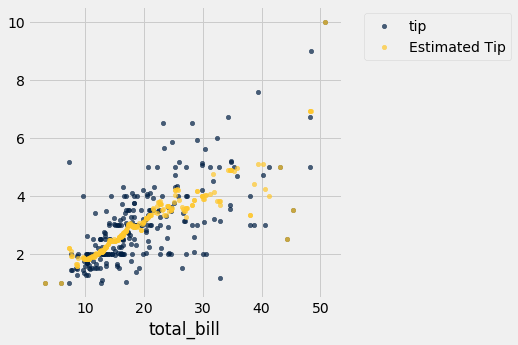

In [52]:
# createa scatter plot of the tips vs estimated tips 
estnew.select('total_bill','tip', 'Estimated Tip').scatter('total_bill')